### I Got It!
##### Everthing comes back but time doesnot so enjoy every moment in your life.
##### Even Checking the exam!!

#### Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist

## Analysis

In [ ]:
data = pd.read_csv("restaurent_sales.csv")

In [ ]:
data.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
sales                   0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [ ]:
numeric_cols = ['order_id','item_price', 'sales', 'transaction_amount']

In [ ]:
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean(), inplace=False)

In [ ]:
scaler = StandardScaler()

In [ ]:
data[['item_price', 'sales', 'transaction_amount']] = scaler.fit_transform(data[['item_price', 'sales', 'transaction_amount']])

In [ ]:
data[['item_price', 'sales', 'transaction_amount']] = np.log(data[['item_price', 'sales', 'transaction_amount']])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [ ]:
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
data['Date'] = pd.to_datetime(data['date'])

In [ ]:
data = data.dropna()

In [ ]:
data = data.sort_values(by='date')

In [ ]:
data['DateTime'] = pd.to_datetime(data['Date'])
data.set_index('DateTime', inplace=True)
data= data.sort_index()


In [ ]:
window_size = 30
data['Moving_Avg'] = data['sales'].rolling(window=window_size).mean()

### TREND

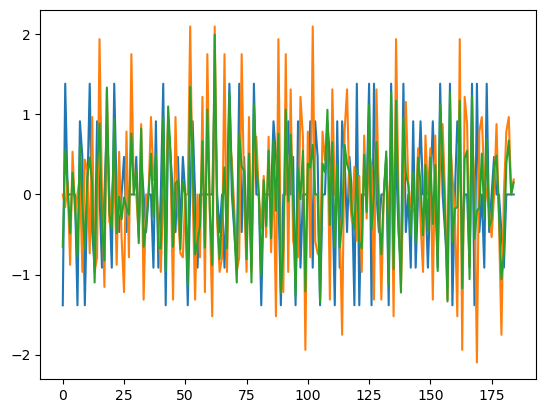

In [ ]:
X = data[['item_price', 'sales', 'transaction_amount']].values
diff = list()
for i in range(1, len(X)):
 value = X[i] - X[i - 1]
 diff.append(value)
pyplot.plot(diff)
pyplot.show()

### Seasonality

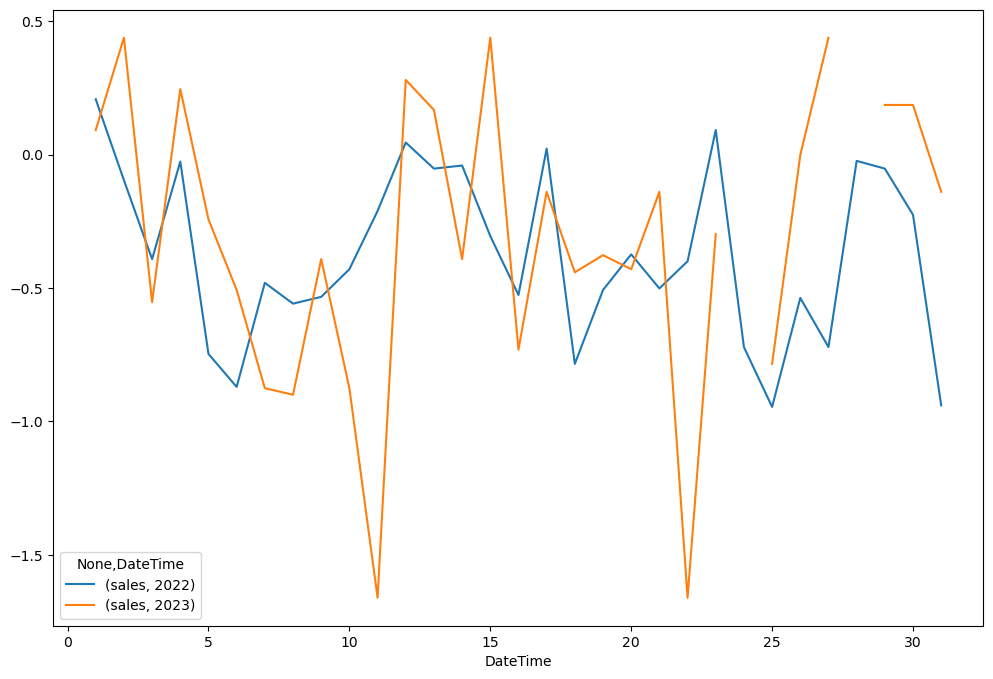

In [ ]:

def seasonal_plot(df, season='year', index='month', column=None):
    if column == None:
        column = df.columns[0]

    piv_index = getattr(df.index, index)
    piv_season = getattr(df.index, season)

    piv = pd.pivot_table(df, index=piv_index, columns=piv_season, values=[column])
    piv.plot(figsize=(12,8))
seasonal_plot(data, 'year', 'day', 'sales')

### Residual

In [ ]:
linear_model = ols('sales ~ item_name',  data=data).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6448
Date:                Sat, 01 Jun 2024   Prob (F-statistic):              0.526
Time:                        10:15:11   Log-Likelihood:                -192.33
No. Observations:                 186   AIC:                             390.7
Df Residuals:                     183   BIC:                             400.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.38

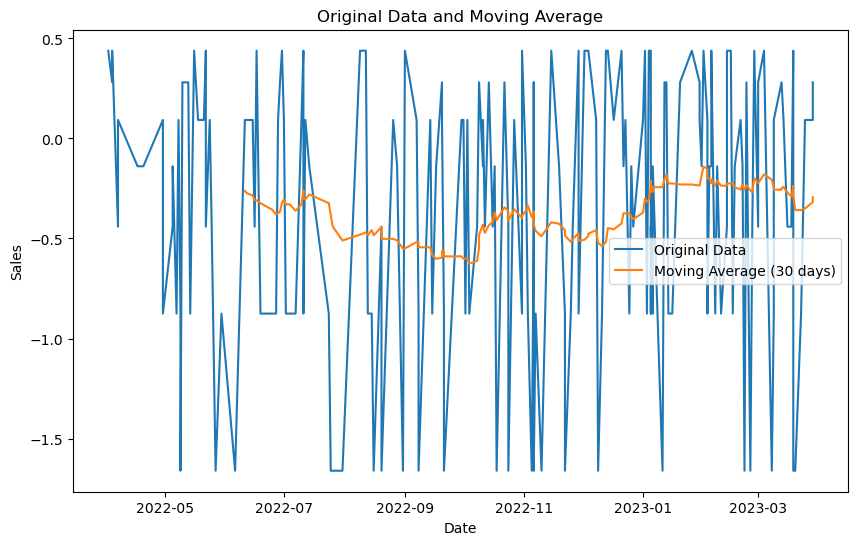

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['sales'], label='Original Data')
plt.plot(data['Moving_Avg'], label=f'Moving Average ({window_size} days)')
plt.title('Original Data and Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
x1 = df['Annual Income (k$)'].to_numpy()
x2 = df['Spending Score (1-100)'].to_numpy()

In [ ]:
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
for k in K:
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)
	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

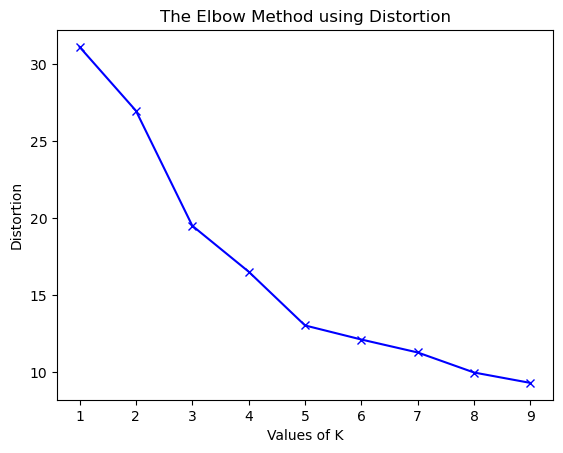

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


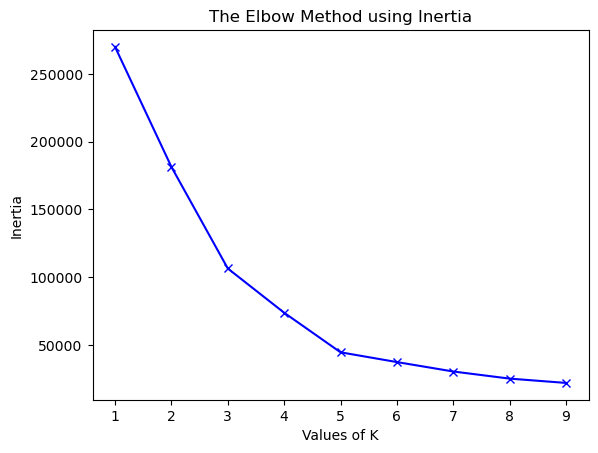

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


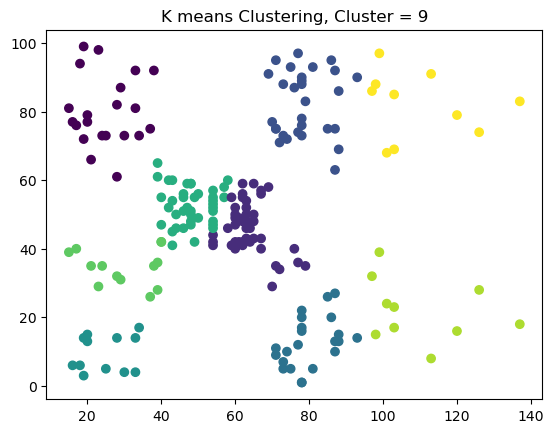

In [ ]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)
plt.title('K means Clustering, Cluster = 9')
plt.scatter(x1, x2, c=kmeans.labels_)
plt.show()

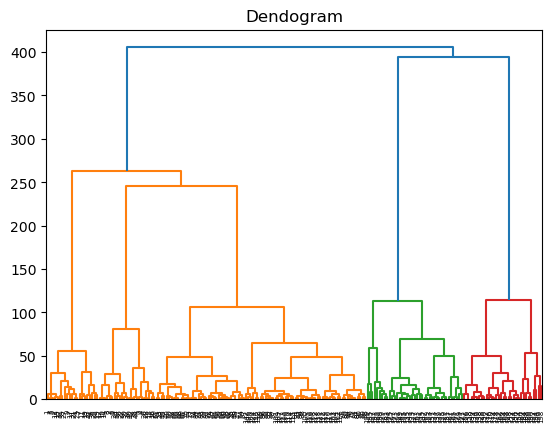

In [ ]:
linkage_data = linkage(X, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.title('Dendogram')
plt.show()

In [ ]:
np.random.seed(42)

In [ ]:
num_samples = 1000

In [ ]:
data = {
    'Avg. Area Income': np.random.normal(70000,15000,num_samples),
    'Avg. Area Age': np.random.normal(10,5,num_samples),
    'Avg. Area Number of Rooms': np.random.normal(7,1.5,num_samples),
    'Avg. Area Number of Bedrooms': np.random.normal(1,8,num_samples),
    'Avg. Area Population': np.random.normal(30000,80000,num_samples),
    'Price': np.random.normal(300000, 800000,num_samples)

}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.to_csv('USA_Housing.csv', index = False)

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

MSE : nan


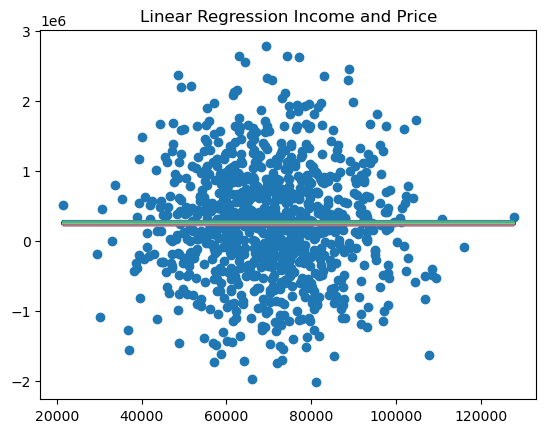

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(X_train['Avg. Area Income'], y_train)
predict_y = slope * X_train['Avg. Area Income'] + intercept
def myfunc(x):
  return slope * X_train['Avg. Area Income'] + intercept

mymodel = list(map(myfunc, X_train['Avg. Area Income']))
MSE = np.mean((y_test-predict_y)**2)
print("MSE :", MSE)
plt.title('Linear Regression Income and Price')
plt.scatter(X_train['Avg. Area Income'], y_train)
plt.plot(X_train['Avg. Area Income'], mymodel)
plt.show()


MSE : nan


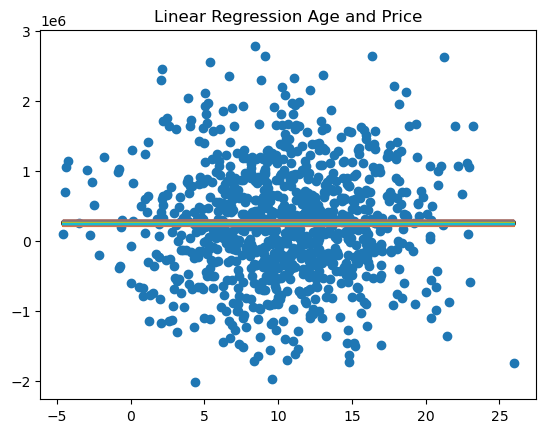

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(X_train['Avg. Area Age'], y_train)
predict_y = slope * X_train['Avg. Area Age'] + intercept
def myfunc(x):
  return slope * X_train['Avg. Area Age'] + intercept

mymodel = list(map(myfunc, X_train['Avg. Area Age']))
MSE = np.mean((y_test-predict_y)**2)
print("MSE :", MSE)
plt.title('Linear Regression Age and Price')
plt.scatter(X_train['Avg. Area Age'], y_train)
plt.plot(X_train['Avg. Area Age'], mymodel)
plt.show()


MSE : nan


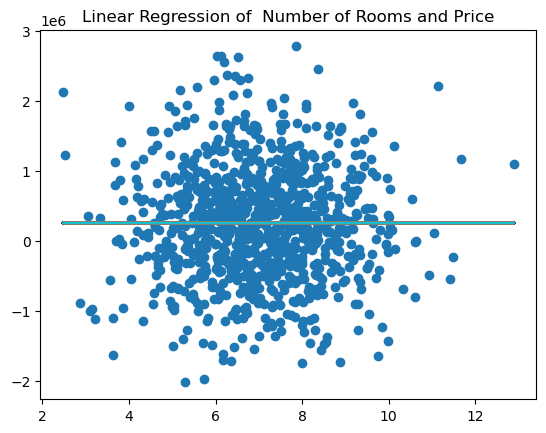

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(X_train['Avg. Area Number of Rooms'], y_train)
predict_y = slope * X_train['Avg. Area Number of Rooms'] + intercept
def myfunc(x):
  return slope * X_train['Avg. Area Number of Rooms'] + intercept

mymodel = list(map(myfunc, X_train['Avg. Area Number of Rooms']))
MSE = np.mean((y_test-predict_y)**2)
print("MSE :", MSE)
plt.title('Linear Regression of  Number of Rooms and Price')
plt.scatter(X_train['Avg. Area Number of Rooms'], y_train)
plt.plot(X_train['Avg. Area Number of Rooms'], mymodel)
plt.show()


MSE : nan


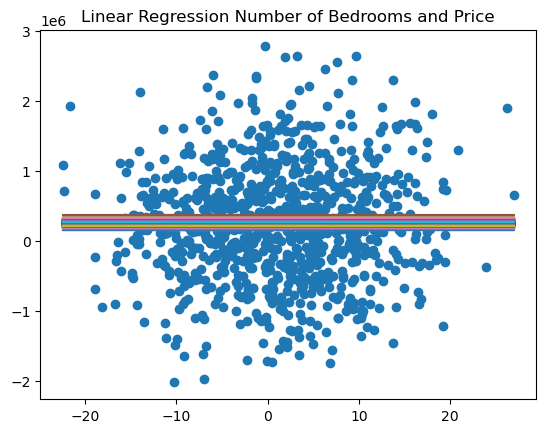

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(X_train['Avg. Area Number of Bedrooms'], y_train)
predict_y = slope * X_train['Avg. Area Number of Bedrooms'] + intercept
def myfunc(x):
  return slope * X_train['Avg. Area Number of Bedrooms'] + intercept

mymodel = list(map(myfunc, X_train['Avg. Area Number of Bedrooms']))
MSE = np.mean((y_test-predict_y)**2)
print("MSE :", MSE)
plt.title('Linear Regression Number of Bedrooms and Price')
plt.scatter(X_train['Avg. Area Number of Bedrooms'], y_train)
plt.plot(X_train['Avg. Area Number of Bedrooms'], mymodel)
plt.show()


MSE : nan


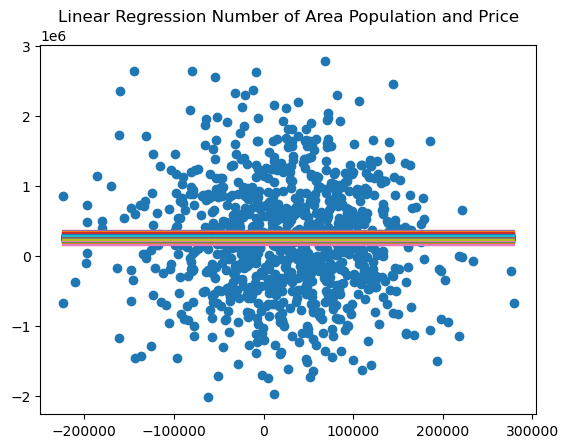

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(X_train['Avg. Area Population'], y_train)
predict_y = slope * X_train['Avg. Area Population'] + intercept
def myfunc(x):
  return slope * X_train['Avg. Area Population'] + intercept

mymodel = list(map(myfunc, X_train['Avg. Area Population']))
MSE = np.mean((y_test-predict_y)**2)
print("MSE :", MSE)
plt.title('Linear Regression Number of Area Population and Price')
plt.scatter(X_train['Avg. Area Population'], y_train)
plt.plot(X_train['Avg. Area Population'], mymodel)
plt.show()


In [ ]:
np.random.seed(42)

num_samples = 1000
data = {
    'Engine Size': np.random.normal(2.5, 0.5, num_samples),  # Engine size in liters
    'Cylinders': np.random.randint(4, 8, num_samples),      # Number of cylinders
    'Fuel Consumption': np.random.normal(8, 2, num_samples),  # L/100km
    'CO2 Emissions': np.random.normal(200, 50, num_samples),  # g/km
    'Car Price': np.random.normal(30000, 15000, num_samples)  # USD
}

df = pd.DataFrame(data)
df.to_csv('Car_Prices.csv', index=False)

In [ ]:
df = pd.read_csv('Car_Prices.csv',index_col=False)

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [ ]:
predict_y = slope * X_train + intercept
MSE = np.mean((y_test-predict_y)**2)


In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

AttributeError: 'SVC' object has no attribute 'SVC'